In [21]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.patches as patches

from matplotlib import pyplot as plt

In [22]:
datasets = np.load('npz/ObjectDetection.npz', allow_pickle=True)
images, numbers, bboxes = datasets['images'], datasets['numbers'], datasets['bboxes']

print(images.shape)
print(numbers.shape)


(3348, 24, 32, 1)
(3348,)


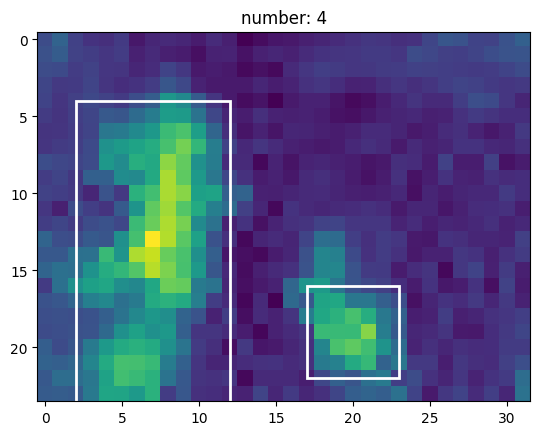

In [38]:
image = images[2800]
number = numbers[2800]
# 임계값을 적용하여 열원을 탐지
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 좌표 추출
points = np.column_stack(np.where(thresholded.transpose() > 0))

# DBSCAN 클러스터링을 실행
clustering = DBSCAN(eps=3, min_samples=2).fit(points)
labels = clustering.labels_

# 각 레이블에 대한 포인트를 그룹화하고 각 그룹에 대해 바운딩 박스를 계산
bboxes = []
for label in np.unique(labels):
    if label == -1:
        continue  # 노이즈는 무시한다.
    # 현재 레이블의 모든 포인트를 선택한다.
    label_points = points[labels == label]
    x, y, w, h = cv2.boundingRect(label_points.astype(np.int32))
    bboxes.append((x, y, w, h))

# 가장 큰 바운딩 박스를 선택 (여기서는 number를 사용한다)
bboxes = sorted(bboxes, key=lambda b: b[2]*b[3], reverse=True)[:number]

# Matplotlib을 사용하여 이미지에 바운딩 박스를 그린다.
fig, ax = plt.subplots(1)
ax.imshow(image)

# 그릴 바운딩 박스를 설정한다.
for (x, y, w, h) in bboxes:
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='w', facecolor='none')
    ax.add_patch(rect)

plt.title(f'number: {number}')
plt.show()

In [61]:
# 함수 정의: 이미지와 인원 수를 받아서 바운딩 박스를 그린다.
def draw_bounding_boxes(image, number):
    # 임계값을 적용하여 열원을 탐지
    _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 좌표 추출
    points = np.column_stack(np.where(thresholded.transpose() > 0))

    # DBSCAN 클러스터링을 실행
    clustering = DBSCAN(eps=2, min_samples=2).fit(points)
    labels = clustering.labels_

    # 각 레이블에 대한 포인트를 그룹화하고 각 그룹에 대해 바운딩 박스를 계산
    bboxes = []
    for label in np.unique(labels):
        if label == -1:
            continue  # 노이즈는 무시한다.
        # 현재 레이블의 모든 포인트를 선택한다.
        label_points = points[labels == label]
        x, y, w, h = cv2.boundingRect(label_points.astype(np.int32))
        bboxes.append((x, y, w, h))

    # 가장 큰 바운딩 박스를 선택
    bboxes = sorted(bboxes, key=lambda b: b[2]*b[3], reverse=True)[:number]

    # Matplotlib을 사용하여 이미지에 바운딩 박스를 그린다.
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap = 'binary')

    # 그릴 바운딩 박스를 설정한다.
    for (x, y, w, h) in bboxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.title(f'numbers: {number}')
    plt.show()



(24, 32, 1)


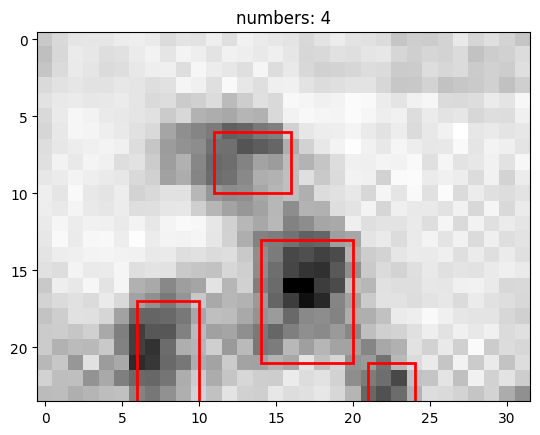

(24, 32, 1)


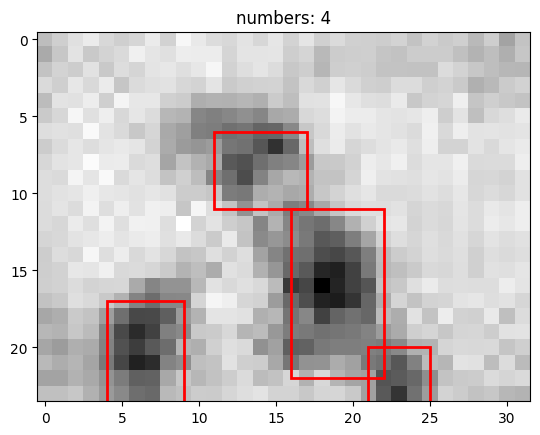

(24, 32, 1)


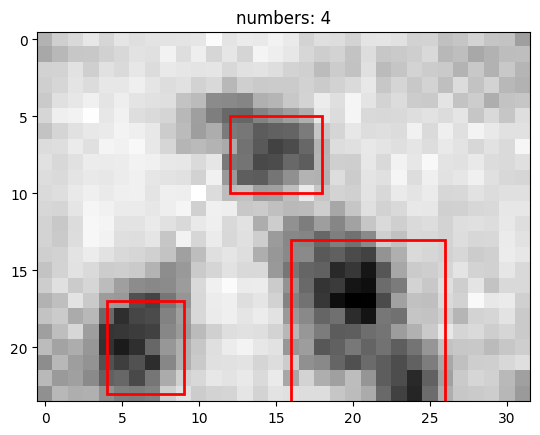

(24, 32, 1)


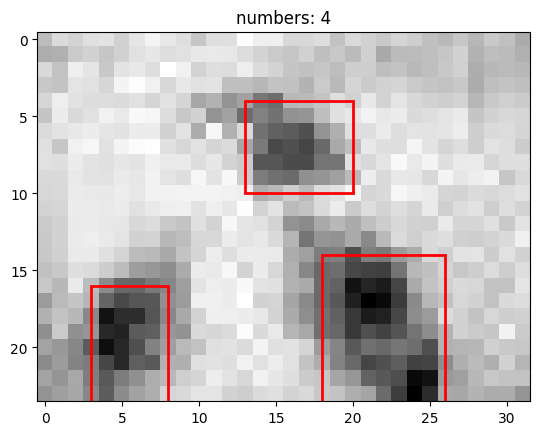

(24, 32, 1)


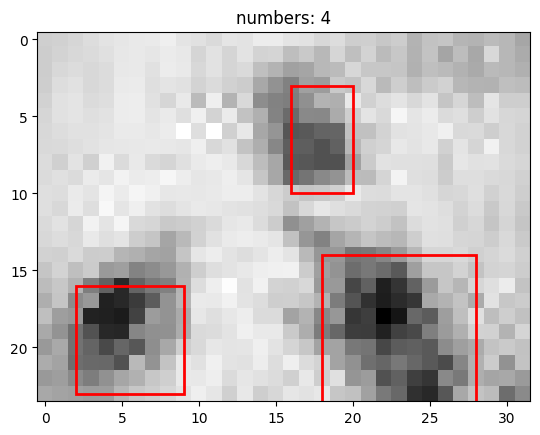

(24, 32, 1)


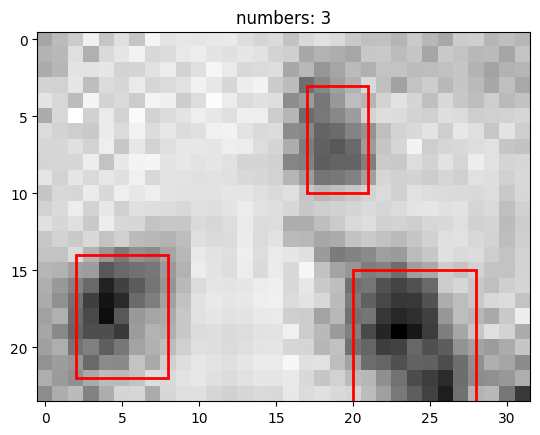

(24, 32, 1)


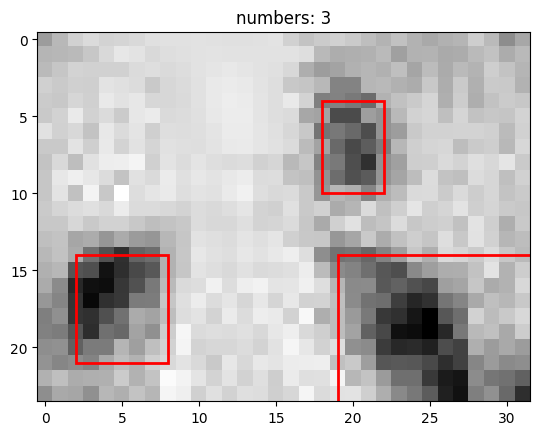

(24, 32, 1)


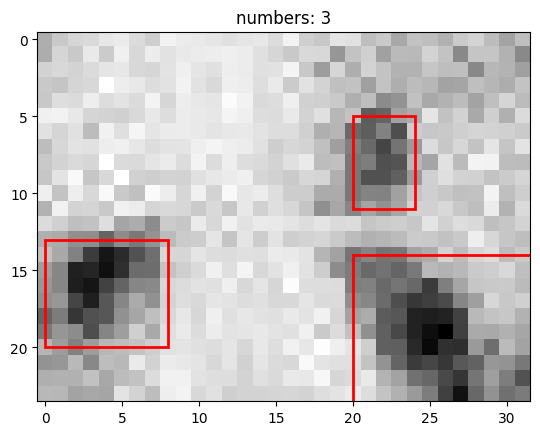

(24, 32, 1)


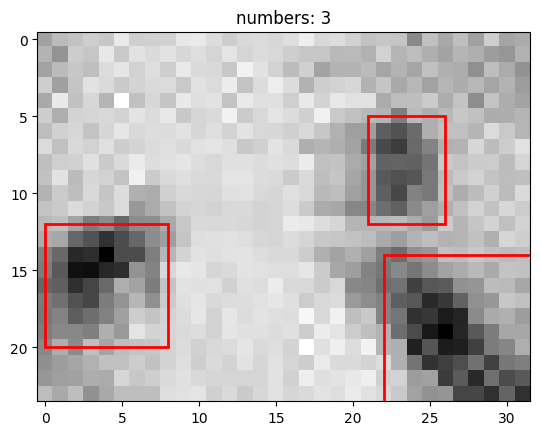

(24, 32, 1)


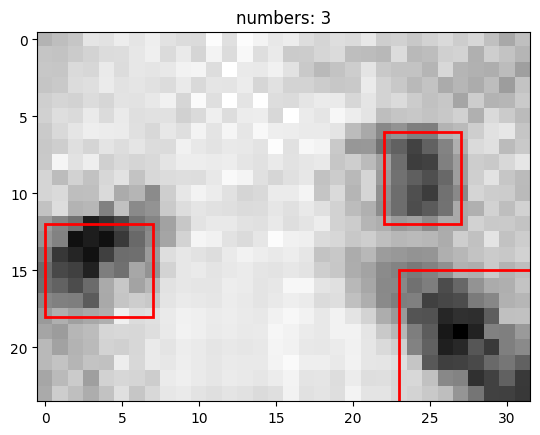

In [63]:
for i in range(10):
    image = images[2900 - i]
    print(image.shape)
    number = numbers[2900 - i]
    draw_bounding_boxes(image, number)